<a href="https://colab.research.google.com/github/MarkNgendo/Financial-Inclusion-Analysis/blob/main/Moringa__Week_2_Independent_Core_Project_4_21_Mark_Ngendo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Defining the Question and Contextualizing the Analysis***

## **Research Question**


How can we predict which individuals are most likely to have or use a bank account?

## Context of the Analysis


Financial Inclusion remains one of the main obstacles to economic and human development in Africa.Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## **Analsyis**

In [ ]:
## Importing the Libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Viewing the data

In [ ]:
findf = pd.read_csv('Financial Dataset - 1.csv')
definitions = pd.read_csv('VariableDefinitions.csv')

findf.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
findf.shape

(23524, 13)

In [ ]:
findf.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1631,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
findf.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

### Tidying the dataset

In [ ]:
findf.rename(columns = {'Has a Bank account': 'account_holder', 'Type of Location': 'location', 'Cell Phone Access': 'phone_access',
          'Respondent Age': 'age', 'gender_of_respondent': 'gender', 'The relathip with head': 'rship_w/head', 'Level of Educuation': 'education',
          'Type of Job': 'job'}, inplace=True)

findf.head()

,country,year,uniqueid,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
findf.duplicated().sum()

0

In [ ]:
findf.isnull().sum()

country           14
year               0
uniqueid           0
account_holder    36
location          15
phone_access      11
household_size    28
age               34
gender            34
rship_w/head       4
marital_status    32
education         29
job               30
dtype: int64

In [ ]:
# Dropping unnecessary columns and  null values as well

findf2 = findf.drop(['uniqueid'], axis=1)

findf2.dropna(inplace=True)
findf2.head()

,country,year,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


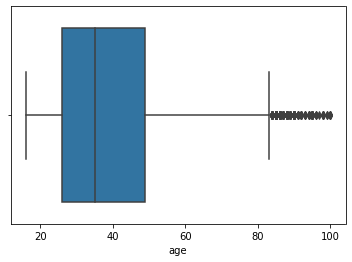

In [ ]:
# Checking for Outliers

sns.boxplot(findf2['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


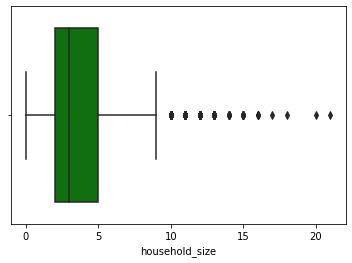

In [ ]:
sns.boxplot(findf2['household_size'], color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


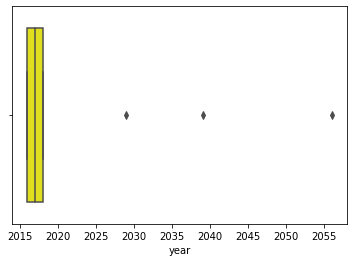

In [ ]:
sns.boxplot(findf2['year'], color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

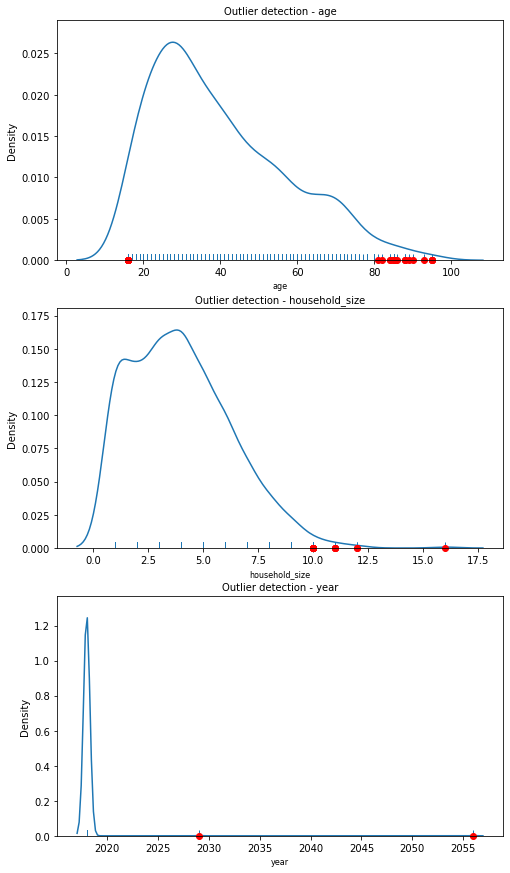

In [ ]:
# Removing Outliers
def pct_outliers(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

cols = ['age','household_size','year']

fig, ax = plt.subplots(len(cols), figsize=(8,15))

for i, col_val in enumerate(cols):
    x = findf2[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[pct_outliers(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title(f'Outlier detection - {col_val}', fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [ ]:
findf2.sample()

,country,year,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
1644,Kenya,2018,No,Rural,Yes,6.0,39.0,Male,Head of Household,Married/Living together,Primary education,Informally employed


In [ ]:
findf2['year'].value_counts()

2016    8683
2018    8157
2017    6500
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [ ]:
findf2 = findf2[findf2['year'] < 2020]

findf2['year'].value_counts()

2016    8683
2018    8157
2017    6500
Name: year, dtype: int64

In [ ]:
# Checking for anomalies

q1_age, q3_age = findf2['age'].quantile([.25, .75])
iqr_age = q3_age - q1_age

q1_hh, q3_hh = findf2['household_size'].quantile([.25, .75])
iqr_hh = q3_hh - q1_hh

print(iqr_hh, iqr_age)


findf2['age'].std()

3.0 23.0


16.519904564514412

### Univariate analysis

In [ ]:
# Number of countries in the data

findf2['country'].value_counts()

Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64

In [ ]:
# Mode of education level

findf2['education'].mode()

0    Primary education
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


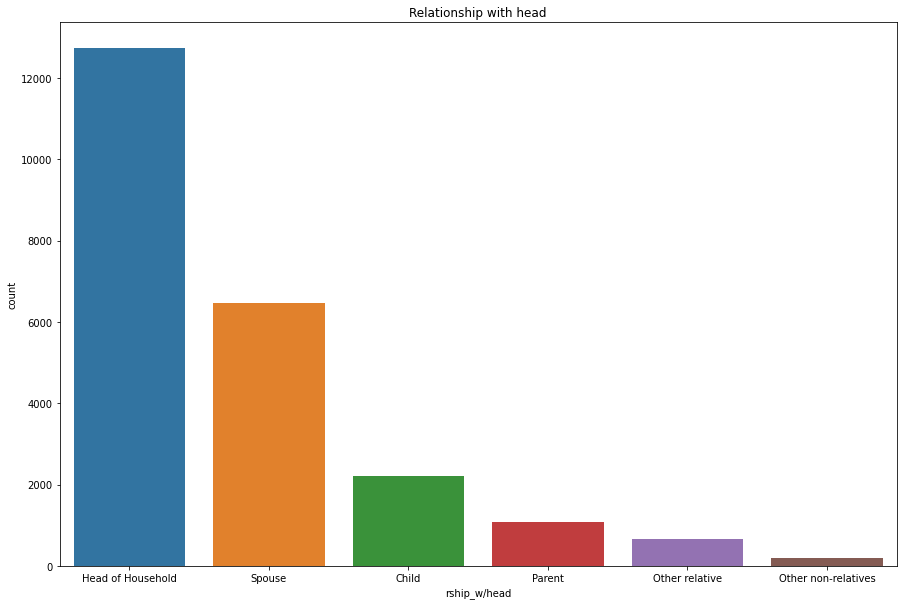

In [ ]:
# Relationship with head plots
plt.figure(figsize=(15,10))
sns.countplot(findf2['rship_w/head'].dropna(), order = findf2['rship_w/head'].value_counts().index)

plt.title('Relationship with head')

plt.show()

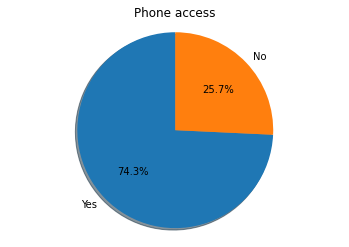

In [ ]:
# Phone access visualization

plt.pie(findf2['phone_access'].value_counts().values, 
        labels=findf2['phone_access'].value_counts().index,
        autopct='%1.1f%%', startangle=90,
        shadow=True)
plt.axis('equal')
plt.title('Phone access')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


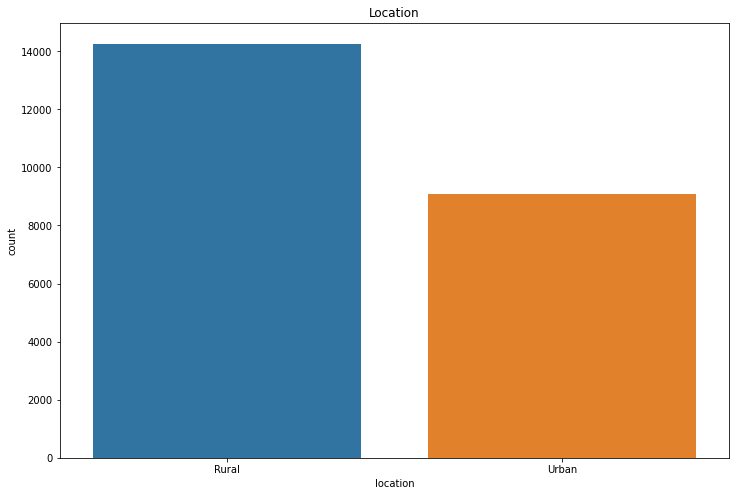

In [ ]:
# Location univariate analysis

plt.figure(figsize=(12,8))

sns.countplot(findf2['location'], order = findf2['location'].value_counts().index)
plt.title('Location')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


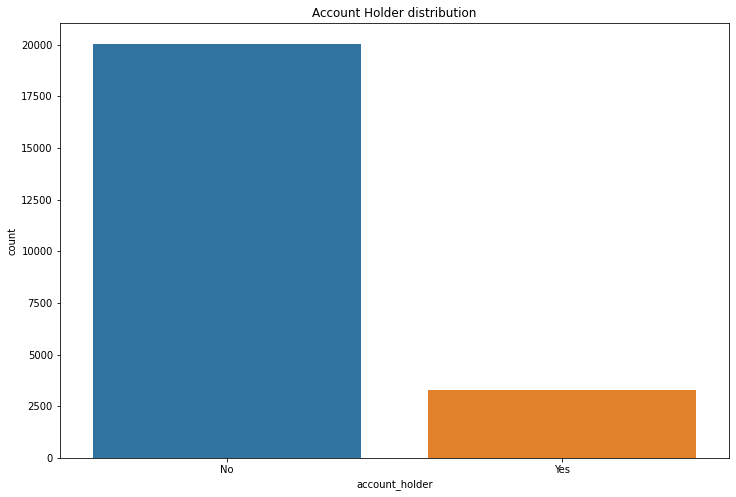

In [ ]:
# Account holder univariate analysis

plt.figure(figsize=(12,8))

sns.countplot(findf2['account_holder'], order = findf2['account_holder'].value_counts().index)
plt.title('Account Holder distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


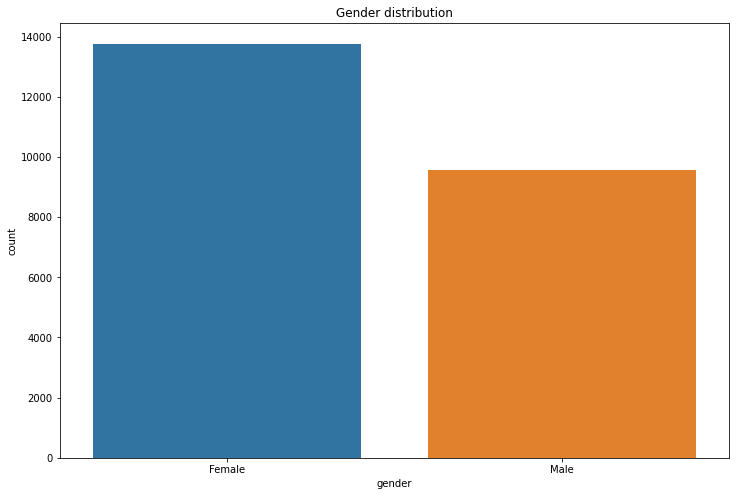

In [ ]:
# Gender distribution on the dataset
plt.figure(figsize=(12,8))
sns.countplot(findf2['gender'], order=findf2['gender'].value_counts().index)
plt.title('Gender distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


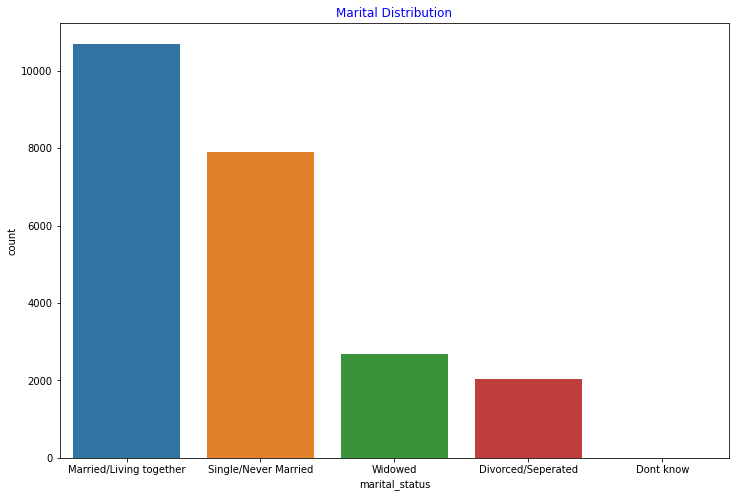

In [ ]:
# Marital status of Respondents

plt.figure(figsize=(12,8))

sns.countplot(findf2['marital_status'], order = findf2['marital_status'].value_counts().index)
plt.title('Marital Distribution', color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


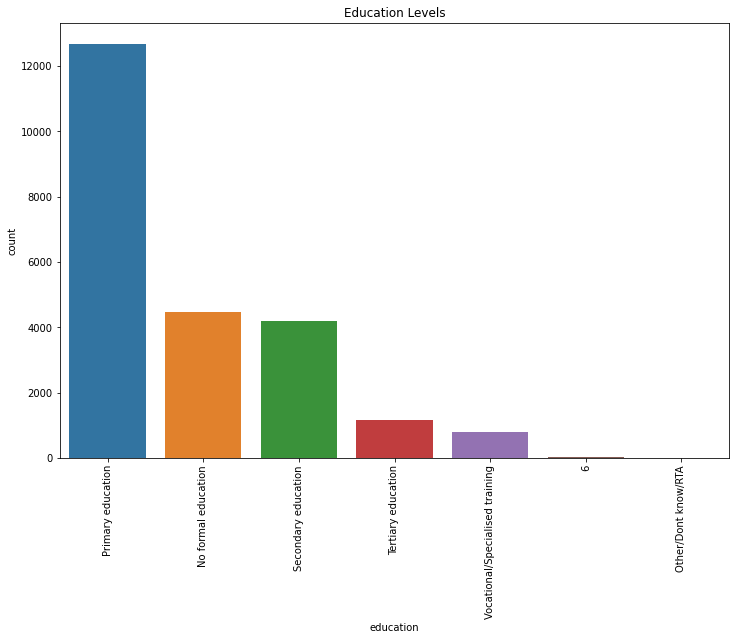

In [ ]:
# Educaton Level analysis

plt.figure(figsize=(12,8))

sns.countplot(findf2['education'], order = findf2['education'].value_counts().index)
plt.title('Education Levels')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


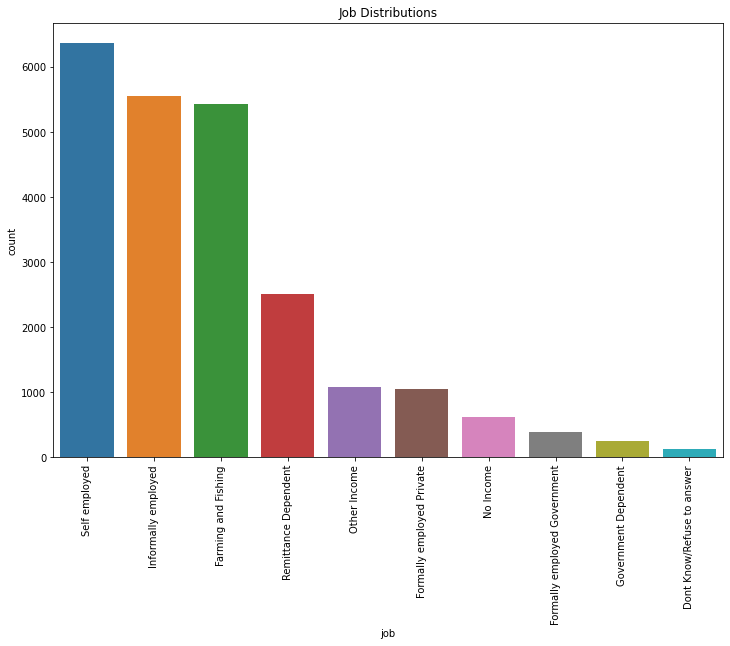

In [ ]:
# Job dstribution analysis

plt.figure(figsize=(12,8))

sns.countplot(findf2['job'], order = findf2['job'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Job Distributions')
plt.show()

In [ ]:
# Creating a dataset with account holders only
ac = findf2[findf2['account_holder'] == 'Yes']
ac.head()

,country,year,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
8,Kenya,2018,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
11,Kenya,2018,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
17,Kenya,2018,Yes,Rural,Yes,6.0,27.0,Female,Head of Household,Married/Living together,Secondary education,Self employed


In [ ]:
ac['job'].mode()
# shows that the most likely to have an account will probably be selfemployed

0    Self employed
dtype: object

In [ ]:
ac['job'].value_counts()

Self employed                   844
Farming and Fishing             634
Formally employed Private       566
Informally employed             440
Formally employed Government    299
Remittance Dependent            240
Other Income                    196
Government Dependent             50
Dont Know/Refuse to answer       14
No Income                        13
Name: job, dtype: int64

In [ ]:
ac['country'].value_counts()

Kenya       1519
Rwanda       997
Tanzania     599
Uganda       181
Name: country, dtype: int64

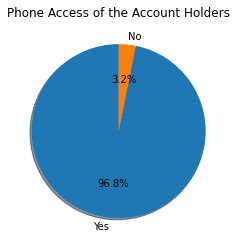

In [ ]:
plt.pie(ac['phone_access'].value_counts().values, shadow=True,labels=ac['phone_access'].value_counts().index ,startangle=90, autopct ='%1.1f%%')
plt.title('Phone Access of the Account Holders')
plt.show()

### Bivariate Analysis

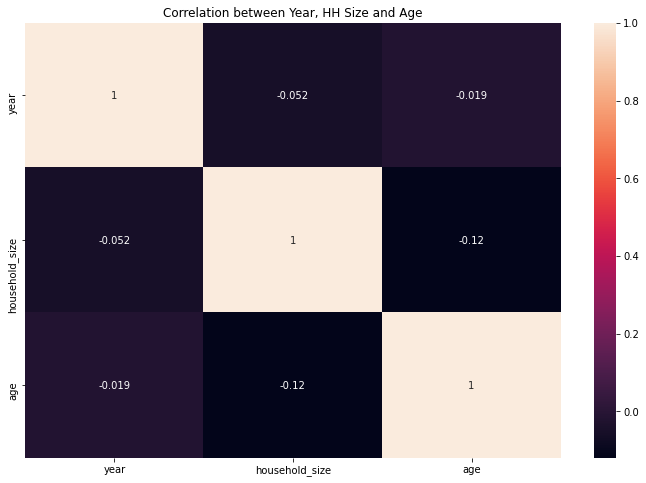

In [ ]:
# correaltion between variables in the dataset

plt.figure(figsize=(12,8))
sns.heatmap(findf2.corr(), annot=True)
plt.title('Correlation between Year, HH Size and Age')
plt.show()

In [ ]:
# the heatmap shows very weak correlations between the variables


In [ ]:
# Relationship between HH Size, Age and Education
group = findf2.groupby(['education']).mean()[['age', 'household_size']]

group


,age,household_size
education,,
6,50.481481,3.814815
No formal education,51.047459,3.657936
Other/Dont know/RTA,47.250000,4.250000
Primary education,37.727617,3.637768
Secondary education,31.388017,4.190442
Tertiary education,32.220472,2.718285
Vocational/Specialised training,35.521848,3.403246


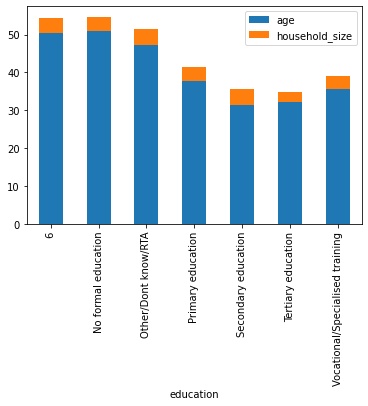

In [ ]:
group.plot.bar(stacked=True)

### Multivariate Analysis

### *Implementing the solution (using LDA)*

In [ ]:
findf2.head()

,country,year,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
findf2['account_holder'].replace({'Yes': 1, 'No': 0}, inplace=True)
findf2['location'].replace({'Rural': 1, 'Urban': 0}, inplace = True)
findf2['gender']. replace({'Female': 1, 'Male': 0}, inplace=True)
findf2['phone_access'].replace({'Yes': 1, 'No' : 0}, inplace = True)

findf2.head()

,country,year,account_holder,location,phone_access,household_size,age,gender,rship_w/head,marital_status,education,job
0,Kenya,2018,1,1,1,3.0,24.0,1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,1,0,5.0,70.0,1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,0,1,5.0,26.0,0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,1,1,5.0,34.0,1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,0,0,8.0,26.0,0,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Converting the columns into numerical ones

findf3 = pd.get_dummies(findf2, prefix_sep='_', drop_first=True)

findf3.head()

,year,account_holder,location,phone_access,household_size,age,gender,country_Rwanda,country_Tanzania,country_Uganda,rship_w/head_Head of Household,rship_w/head_Other non-relatives,rship_w/head_Other relative,rship_w/head_Parent,rship_w/head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_No formal education,education_Other/Dont know/RTA,education_Primary education,education_Secondary education,education_Tertiary education,education_Vocational/Specialised training,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed
0,2018,1,1,1,3.0,24.0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,0,1,0,5.0,70.0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,1,5.0,26.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,0,1,1,5.0,34.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,0,0,0,8.0,26.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
findf3.columns

Index(['year', 'account_holder', 'location', 'phone_access', 'household_size',
       'age', 'gender', 'country_Rwanda', 'country_Tanzania', 'country_Uganda',
       'rship_w/head_Head of Household', 'rship_w/head_Other non-relatives',
       'rship_w/head_Other relative', 'rship_w/head_Parent',
       'rship_w/head_Spouse', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_No formal education', 'education_Other/Dont know/RTA',
       'education_Primary education', 'education_Secondary education',
       'education_Tertiary education',
       'education_Vocational/Specialised training', 'job_Farming and Fishing',
       'job_Formally employed Government', 'job_Formally employed Private',
       'job_Government Dependent', 'job_Informally employed', 'job_No Income',
       'job_Other Income', 'job_Remittance Dependent', 'job_Self employed'],
      dtype='object')

In [ ]:
# Preprocessing
x = findf3.drop('account_holder', 1).values
y = findf3['account_holder'].values

In [ ]:
print(x.shape)
print(y.shape)

(23340, 33)
(23340,)


In [ ]:
# Dividing the code into test and training data
from sklearn.model_selection import  train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [ ]:
# Training and making predictions
from sklearn.ensemble import RandomForestClassifier


classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluating the performance
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[3994   42]
 [ 483  149]]
Accuracy: 0.8875321336760925


From the above results, we can see that with one linear discriminant, we get an accuracy of 88.8 %

### Challenging the solution

In [ ]:
# The current dataset dates back to 2018 at the very earliest. The importance of this result would significantly change
# if more recent surveys were undertaken.

# The data is also limited in the fact that it does not account for recent developments in technology,
# which allow citizens to use their phones as actual bank accounts as opposed to the traditional means.

## **Conclusions**



1.   Kenya has the lead when it comes to how many people have accounts.
2.   Self employed people are more likely to have a bank account when compared to other employment classes
3.   Phone access has also been highlighted as a big indicator of people likely to have an account.

